### Week 10 Activities

**1. Read data samples from `week-10/datasets/Clustering-Datasets-master/02. Synthetic/3MC.csv`. There are 400 two-dimensional (i.e., the dimension being x and y) samples in the csv.**

In [3]:
import pandas as pd
df = pd.read_csv('datasets/3MC.csv')
df.head()

,x,y,class
0,-3.053,0.787,1
1,-2.535,1.088,1
2,-2.667,0.611,1
3,-2.598,1.323,1
4,2.173,0.864,1


**2. Split the datset into training and test (80%/20% split)**


In [4]:
X = df.drop(columns=['class'])
y = df['class']
X.head(), y.head()

(       x      y
 0 -3.053  0.787
 1 -2.535  1.088
 2 -2.667  0.611
 3 -2.598  1.323
 4  2.173  0.864,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: class, dtype: int64)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


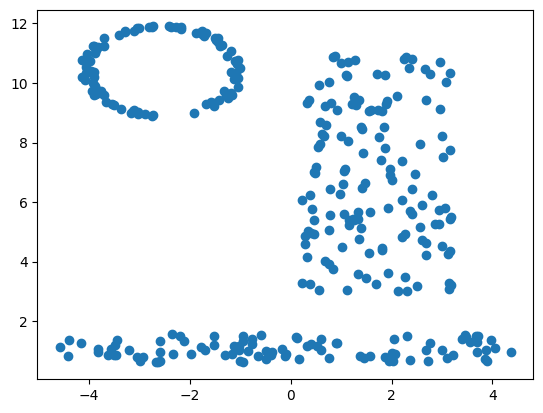

In [84]:
import matplotlib.pyplot as plt

plt.scatter(X_train['x'], X_train['y'])
plt.show()

In [61]:
X_train

,x,y
336,-4.074,10.088
64,-0.767,1.219
55,-1.297,0.868
106,1.578,0.824
300,-3.660,9.377
...,...,...
323,-2.893,8.966
192,1.158,5.225
117,3.975,1.353
47,-3.480,1.211


**3. Use the training set to find 3 clusters of the dataset. **PLEASE DO NOT USE scikit-learn** based clustering libraries. Write your own k-means method implementation.**
- 1. Randomly select 3 centroids from the dataset
- 2. For each data point, calculate the Euclidean distance to each of the centroids, and assign the point to the nearest centroid’s cluster.
- 3. For each cluster, recalculate the centroid by finding the mean of all points assigned to that cluster.
- 4. Repeat steps 2 and 3 until the centroids no longer change significantly (i.e., convergence) or until a maximum number of iterations is reached.
- https://towardsdatascience.com/k-means-without-libraries-python-feb3572e2eef

In [92]:
import random
import numpy as np 

def df_to_list():
    return list(X_train.values)

def choose_centroids(data, k):
    # choose random centroids
    return random.sample(data, k)  

def assign_clusters(data,centroids):
    k = len(centroids)
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for point in data: 
        euclid_distance = []
        for i in range(k):
            euclid_distance.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
        clusters[euclid_distance.index(min(euclid_distance))].append(point)

    return clusters

def recalculate_centroids(clusters, centroids, k ):
    for i in range(k):
        centroids[i] = np.mean(clusters[i],axis=0)
    return centroids

for i in range(300):
    data = df_to_list()
    centroids = choose_centroids(data,3)
    clusters = assign_clusters(data, centroids)
    solution = recalculate_centroids(clusters, centroids, 3)
print(centroids)
print(clusters)




[array([0.10276364, 1.4474    ]), array([1.70038017, 7.2998843 ]), array([-2.67062921, 10.49434831])]
{0: [array([-0.767,  1.219]), array([-1.297,  0.868]), array([1.578, 0.824]), array([-1.516,  1.203]), array([0.52 , 1.155]), array([0.293, 4.847]), array([0.554, 3.051]), array([0.106, 1.458]), array([-0.394,  0.854]), array([1.493, 3.438]), array([3.876, 1.023]), array([2.061, 0.894]), array([-4.58 ,  1.124]), array([1.87 , 0.805]), array([4.367, 0.964]), array([0.687, 4.007]), array([2.693, 1.038]), array([3.486, 1.483]), array([-1.52 ,  1.517]), array([2.357, 0.693]), array([2.767, 1.281]), array([-3.831,  1.061]), array([1.343, 3.587]), array([-3.825,  0.975]), array([2.012, 0.927]), array([1.373, 0.827]), array([0.332, 4.14 ]), array([3.213, 0.846]), array([3.715, 1.502]), array([2.31 , 1.506]), array([-1.009,  0.669]), array([3.695, 1.299]), array([3.468, 1.542]), array([-0.088,  0.893]), array([-0.857,  0.981]), array([-0.494,  0.743]), array([-2.33 ,  0.901]), array([-4.393,  

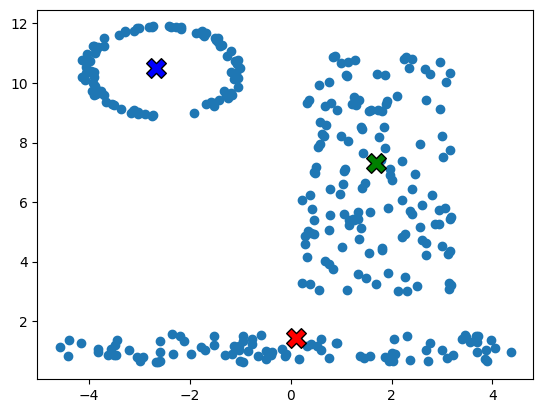

In [93]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b']
plt.scatter(X_train['x'], X_train['y'])
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color=colors[i], edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
plt.show()

4. Evaluate clustering performances in task #3 based on **SSE**, **RandIndex**, **Silhouette Coefficient**.


In [94]:
def calculate_SSE(clusters, centroids):
    sse = 0
    for i, cluster in clusters.items():
        for point in cluster:
            sse += np.linalg.norm(np.array(point) - np.array(centroids[i])) ** 2
    return sse

calculate_SSE(clusters,centroids)

np.float64(1583.8526121133984)

In [95]:
from sklearn.metrics import adjusted_rand_score

labels_pred = []
for point in X_train.values:
    distances = [np.linalg.norm(point - centroid) for centroid in centroids]
    cluster_label = distances.index(min(distances))
    labels_pred.append(cluster_label)
rand_index = adjusted_rand_score(y_train, labels_pred)
print("Adjusted Rand Index:", rand_index)

Adjusted Rand Index: 0.8062952144063469


In [96]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_train, labels_pred)
print(silhouette)

0.5032194105553939


5. If you increase number of clusters in task #3 what type of performance changes do you observe? Please use the elbow technique to determine best number of clustering for the dataset.


6. Just think about implementing hierarchical clustering, producing a dendrogram and apply a cut to obtain the desired number of clusters.
